# **Super-resolution GAN model**
## Purpose
The purpose of this notebook is to use a super-resolution model.

## Setup
### Library import

In [3]:
import os 
import sys 

import ee
import matplotlib.pyplot as plt

# Include local library paths if you have ../src/utils.py
sys.path.append("../src/")

from maps import LeafletMap
from predict import Predictor
from models import srgan

In [4]:
#PRIVATE_KEY = json.loads(os.getenv("EE_PRIVATE_KEY"))

## Initialize Earth Engine
#ee_credentials = ee.ServiceAccountCredentials(email=PRIVATE_KEY['client_email'], key_data=os.getenv("EE_PRIVATE_KEY"))
#ee.Initialize(credentials=ee_credentials)
ee.Initialize()

## **Prediction**

**Select region**

In [5]:
map = LeafletMap(center=[28.487,-16.315], zoom=12)
map

Draw a rectangle on map to select and area.


LeafletMap(center=[28.487, -16.315], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

**Create input image**

In [6]:
array = map.create_input_image()

**Create model**

In [7]:
# Location of model weights
weights_dir = '../data/processed/Models/L8_S2_SR_x3/srgan_generator_L8_to_S2_x3'
weights_file = lambda filename: os.path.join(weights_dir, filename)

pre_generator = srgan.Generator(input_shape=(None, None, 3), scale=3).generator()
pre_generator.load_weights(weights_file('model_weights.h5'))

2023-09-15 13:26:57.348281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-15 13:26:57.369965: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


**Predict**

In [8]:
predictor = Predictor(folder_path = '../data/processed/Models/', dataset_name = 'L8_S2_SR_x3', model = pre_generator)
prediction = predictor.predict(input_array=array, norm_range=[[0,1], [-1,1]])

2023-09-15 13:27:00.993412: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134111232 exceeds 10% of free system memory.


1/1 [==============================] - 1s 1s/step


**Plot**

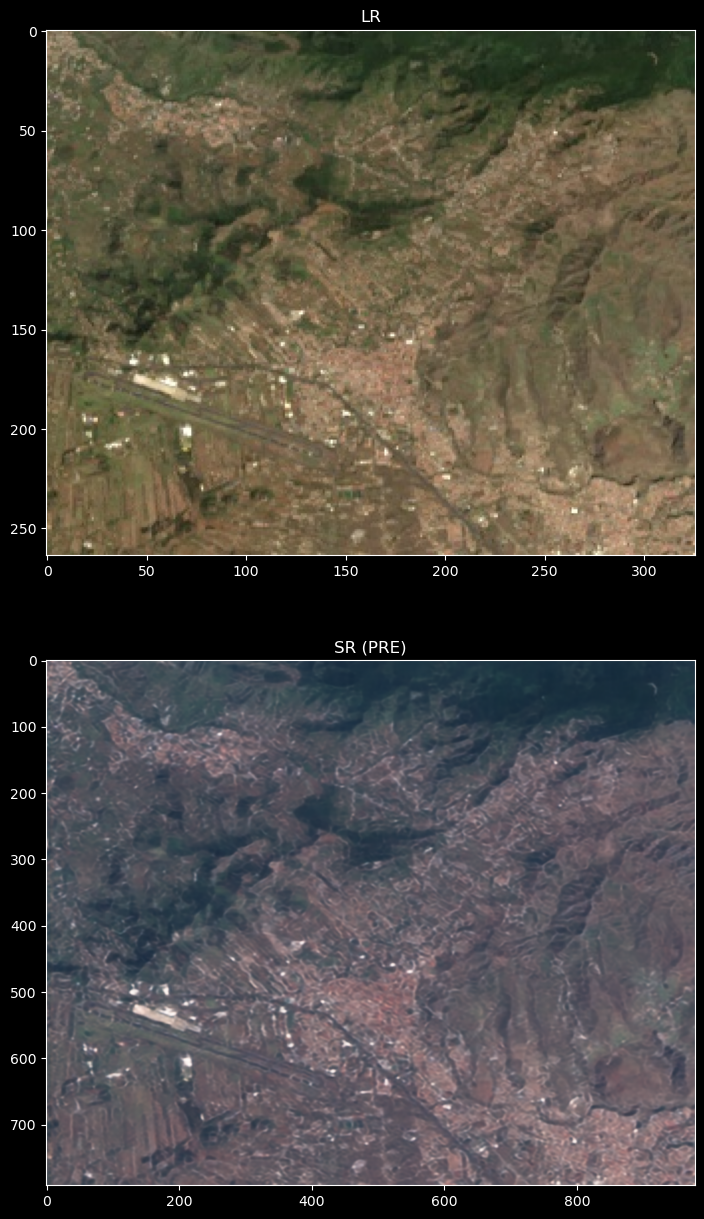

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(20,15))

ax[0].imshow(array[0,:,:,:3])
ax[0].set_title('LR')

ax[1].imshow(prediction[0,:,:,:3])
ax[1].set_title('SR (PRE)')

plt.show()